# Advanced statistical analysis of biomechanical time series: PCA, FDA and SPM

This seminar was held on 6 July 2018 at Trinity Biomedical Sciences Institute in Dublin. This collection of **MATLAB** notebooks is distributed with the seminar materials, and provides extended decriptions of the scripts, which are also distributed with the workshop material ("Scripts" folder):

* FDA_fPCA_Example.m
* FDA_T_Test_Example.m
* SPM_T_Test_Example.m
* SnPM_T_Test_Example.m

These notebooks were created using [**Jupyter**](https://jupyter.org) using the [**Jupyter** **MATLAB** kernel](https://github.com/calysto/matlab_kernel). The HTML renderings of these notebooks (in the ./Notebooks/HTML folder) can be opened in any browser. For proper HTML rendering ensure that the ./Notebooks/HTML/figs folder is saved in the same directory as the HTML files. Alternatively the IPYNB files can be opened in **Jupyter** where you can interactively change the code and see the results.

For any questions related to this seminar or its GitHub repository please email: <john.warmenhoven@hotmail.com>

___________________
## Data source

Warmenhoven, J. S., Harrison, A., Robinson, M., Vanrenterghem, J., Bargary, N., Smith, R., Cobley, S., Draper, C., Donnelly, C., & Pataky, T. (2018). A force profile analysis comparison between functional data analysis, statistical parametric mapping and statistical non-parametric mapping in on-water single sculling. Journal of Science & Medicine in Sport, In Press.  https://doi.org/10.1016/j.jsams.2018.03.009

___________________
## Requirements:

In addition to **MATLAB** (version 2017a or later), The following two software packages are required:

* **fda** (version unknown; dated 2017-08-08) [http://www.functionaldata.org]
* **spm1d** (version M.0.4.5) [(www.spm1d.org)](http://www.spm1d.org)
* **Warmenhoven2018-bow-force.mat** (data file distributed with workshop documents)

___________________
## Step 1:   Set the MATLAB path

In order to use the **fda** and **spm1d** software packages you need to first set the **MATLAB** path so that **MATLAB** knows where to find these packages' functions.  If you are using Windows and you copied the required packages and dataset to the following locations:

* C:\\Temp\\fdaM
* C:\\Temp\\spm1dmatlab
* C:\\Temp\\Data.mat

Then you can set the path in **MATLAB**'s Command Window using the following commands:

In [1]:
addpath('C:\Temp\fdaM')  %path to fda
addpath(genpath('C:\Temp\spm1dmatlab'))   %path to spm1d
addpath('C:\Temp')  %path to the folder in which the data file has been saved

To test that you have set the paths correctly, enter the following commands:


In [2]:
create_bspline_basis([0,100], 51, 6);
spm1d.stats.ttest( randn(8,1) );
load('Warmenhoven2018-bow-force')

If all three of these commands run without errors then the paths have been correctly set.

__________
## Step 2:  Load data


In [3]:
load('Warmenhoven2018-bow-force')

This will load two variables into the **MATLAB** workspace, as listed in the Workspace window.

<img src="figs/screenshot01.jpeg" width="300">

Each variable is a (Q x J) array, where Q=51 is the number of time nodes and J=10 is the number of observations (or subjects).

**Note!**

* **fda** accepts (Q x J) data arrays
* **spm1d** accepts (J x Q) data arrays

____________
## Step 3:  Visualize data

One way to visualize the data is to plot all subjects' data like this:

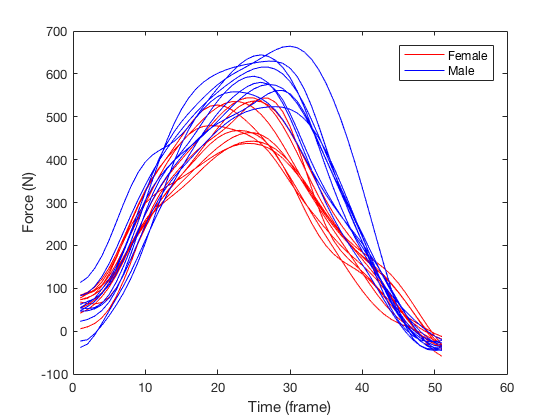

In [4]:
h0 = plot(Pin_Force_Bow_Female, 'r');
hold on
h1 = plot(Pin_Force_Bow_Male, 'b');
legend([h0(1) h1(1)], 'Female', 'Male')
xlabel('Time (frame)')
ylabel('Force (N)')

____________
## Step 4:  Descriptive statitstics

Another way to visualize the data is to use means and standard deviation (SD) clouds like this:

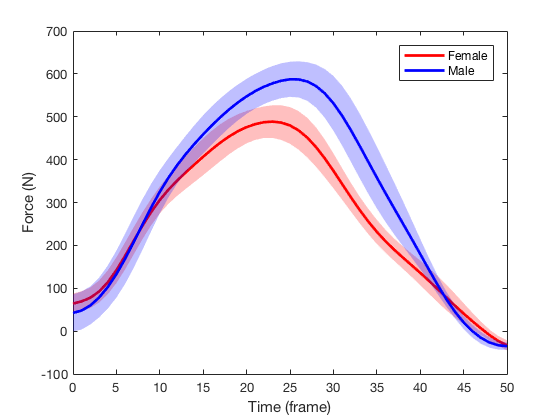

In [5]:
h0 = spm1d.plot.plot_meanSD(Pin_Force_Bow_Female', 'color','r');
hold on
h1 = spm1d.plot.plot_meanSD(Pin_Force_Bow_Male', 'color','b');
legend([h0 h1], 'Female', 'Male')
xlabel('Time (frame)')
ylabel('Force (N)')